<a href="https://colab.research.google.com/github/Darshan0805/Computer-Vision/blob/main/2348548_CV5_LP_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

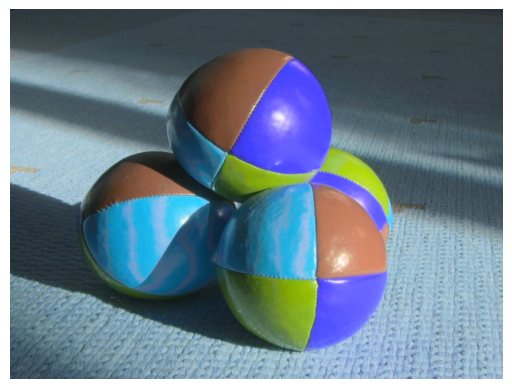

In [ ]:
img = cv2.imread('balls.jpg')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Load the image
image = cv2.imread('balls.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Get the image size
m, n = image.shape

In [ ]:
# Perform FFT and shift the zero-frequency component to the center
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

In [ ]:
# Define the radius for the filters (you can adjust this value)
radius = 30

In [ ]:
# Create a meshgrid for the image
x = np.arange(-n/2, n/2)
y = np.arange(-m/2, m/2)
x, y = np.meshgrid(x, y)

In [ ]:
# Create the ideal low pass filter
D = np.sqrt(x**2 + y**2)
ilpf = np.zeros((m, n))
ilpf[D <= radius] = 1

In [ ]:
# Apply the ideal low pass filter
low_passed = fshift * ilpf
low_passed = np.fft.ifftshift(low_passed)
low_passed = np.fft.ifft2(low_passed)
low_passed = np.abs(low_passed)

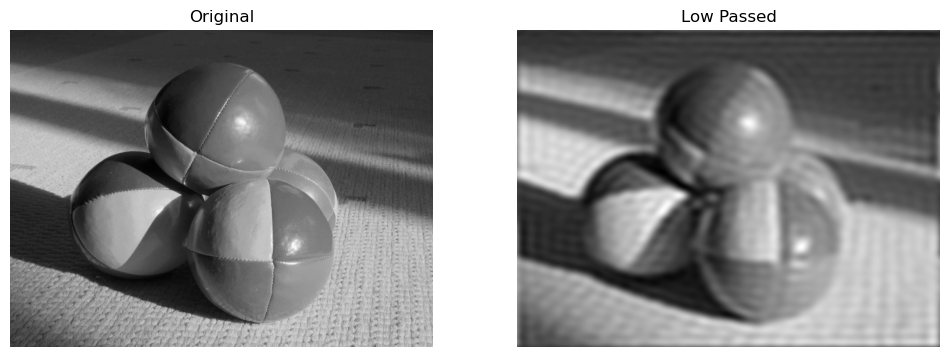

In [ ]:
# Display the original image and the image after applying the low pass filter
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(low_passed, cmap='gray'), plt.title('Low Passed')
plt.axis('off')
plt.show()

In [ ]:
# Create the ideal high pass filter
ihpf = np.zeros((m, n))
ihpf[D > radius] = 1

In [ ]:
# Apply the ideal high pass filter
high_passed = fshift * ihpf
high_passed = np.fft.ifftshift(high_passed)
high_passed = np.fft.ifft2(high_passed)
high_passed = np.abs(high_passed)

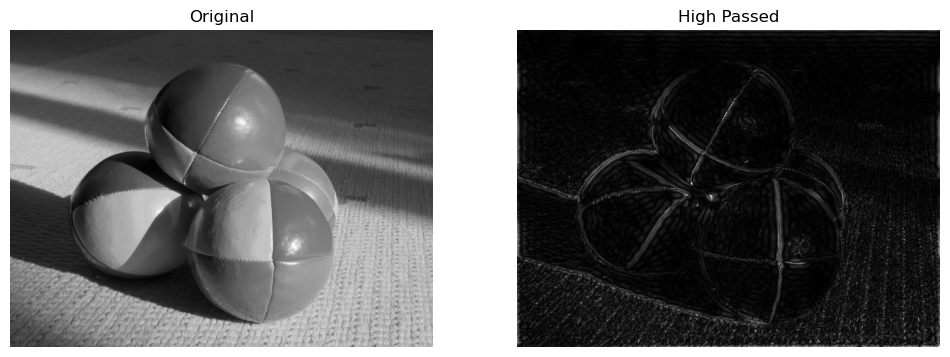

In [ ]:
# Display the original image and the image after applying the high pass filter
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(high_passed, cmap='gray'), plt.title('High Passed')
plt.axis('off')
plt.show()